In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [2]:
# Create an empty list to store the DataFrames
dfs = []

N_sims = 1000

# Loop through the file names
for i in range(1, N_sims + 1):
    file_name = f'../data/values_estimation_production_{i}.csv'  # Assuming the files are in CSV format
    
    # Read the file as a DataFrame
    df = pd.read_csv(file_name)
    
    # Add a simulation number column
    df['simulation_number'] = i
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all the DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

In [3]:

combined_df = combined_df[(combined_df['bl_acfest'] <=  1)
                          ]


combined_df.mean()


bl_ols                 0.718265
bk_ols                 0.367019
bl_xtreg               1.123626
bk_xtreb               0.079428
bk_acfest              0.340801
bl_acfest              0.610059
bl_op                  0.600013
simulation_number    497.683801
dtype: float64

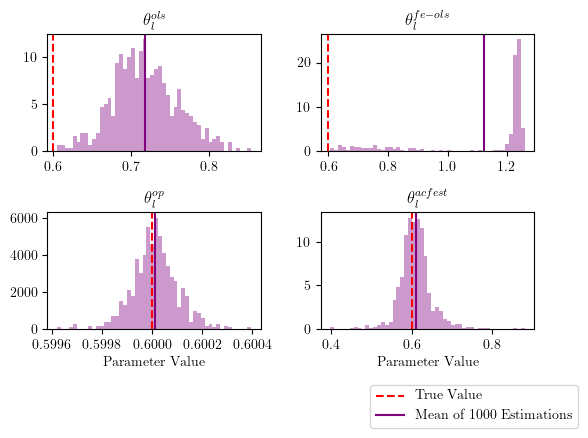

In [4]:

fig, ax = plt.subplots(2, 2, figsize=(6, 5))

purple_color = 'purple'

ax[0, 0].hist(combined_df['bl_ols'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[0, 0].axvline(0.6, color='red', linestyle='dashed')
ax[0, 0].axvline(np.mean(combined_df['bl_ols']), color=purple_color)
ax[0, 0].set_title('$\\theta_{l}^{ols}$')

ax[0, 1].hist(combined_df['bl_xtreg'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[0, 1].axvline(0.6, color='red', linestyle='dashed')
ax[0, 1].axvline(np.mean(combined_df['bl_xtreg']), color=purple_color)
ax[0, 1].set_title('$\\theta_{l}^{fe-ols}$')

ax[1, 0].hist(combined_df['bl_op'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[1, 0].axvline(0.6, color='red', linestyle='dashed')
ax[1, 0].axvline(np.mean(combined_df['bl_op']), color=purple_color)
ax[1, 0].set_title('$\\theta_{l}^{op}$')
ax[1, 0].set_xlabel('Parameter Value')


ax[1, 1].hist(combined_df['bl_acfest'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[1, 1].axvline(0.6, color='red', linestyle='dashed')
ax[1, 1].axvline(np.mean(combined_df['bl_acfest']), color=purple_color)
ax[1, 1].set_title('$\\theta_{l}^{acfest}$')
ax[1, 1].set_xlabel('Parameter Value')

legend_elements = [
    plt.Line2D([0], [0], color='red', linestyle='dashed', label='True Value'),
    plt.Line2D([0], [0], color=purple_color, label='Mean of 1000 Estimations')]
leg = plt.legend(handles=legend_elements,
            loc='lower left',
            bbox_to_anchor=(0.2, -0.9))

# fig.subplots_adjust(bottom=0.78)
plt.tight_layout()

plt.savefig('../plots/estimation_results_production_side.pdf')
plt.show()